# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [4]:
# Instrucciones

#Predecir el costo del seguro médico de una persona
#Este conjunto de datos tiene 7 columnas. 

#columnas Predictoras o explicativas

#edad: edad del beneficiario principal
#sexo: contratista de seguros género, femenino o masculino
#IMC: índice de masa corporal
#niños: Número de niños cubiertos por el seguro de salud / Número de dependientes
#fumador: fumar
#región: el área residencial del beneficiario en los EE. UU., noreste, sureste, suroeste, noroeste.

#Usaremos la columna 'cargos' como la variable objetivo porque queremos crear un modelo 
#que prediga el costo del seguro en función de diferentes factores.
#cargos: costos médicos individuales facturados por el seguro de salud

# your code here

In [5]:
# Importo las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge #libreria de regularizacion
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns
from dotenv import load_dotenv
from sqlalchemy import create_engine
import os
from matplotlib import style
from funpymodeling.exploratory import freq_tbl

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [6]:
#load the .env file variables
load_dotenv()
connection_string = os.getenv('DATABASE_URL')
#print(connection_string)

In [7]:
df_raw = pd.read_csv(connection_string)

In [8]:
df = df_raw.copy()

In [9]:
# exploro la informacion basica de los datos antes de divirdirlos para hacer el EDA

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# Analizo las variables numericas, recordemos que charges es nuestra variable objetivo
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
# Analizo las variables categoricas
# se puede observar las frecuencias de todas las variables categoricas y sus etiquetas
freq_tbl(df)

      sex  frequency  percentage  cumulative_perc
0    male        676    0.505232         0.505232
1  female        662    0.494768         1.000000

----------------------------------------------------------------

  smoker  frequency  percentage  cumulative_perc
0     no       1064    0.795217         0.795217
1    yes        274    0.204783         1.000000

----------------------------------------------------------------

      region  frequency  percentage  cumulative_perc
0  southeast        364    0.272048         0.272048
1  southwest        325    0.242900         0.514948
2  northwest        325    0.242900         0.757848
3  northeast        324    0.242152         1.000000

----------------------------------------------------------------



In [12]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
216,53,female,26.600,0,no,northwest,10355.64100
703,34,female,26.410,1,no,northwest,5385.33790
368,44,male,32.015,2,no,northwest,8116.26885
1070,37,male,37.070,1,yes,southeast,39871.70430
123,44,male,31.350,1,yes,northeast,39556.49450


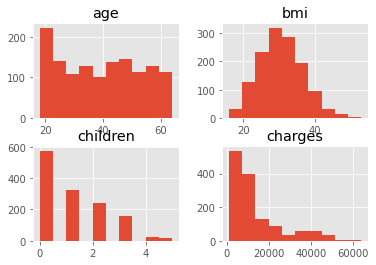

In [13]:
# Veamos la distribucion de las variables numericas
df.hist()
plt.show()

In [14]:
#Se observa una data balanceada

In [15]:

#columnas Predictoras o explicativas

#edad: edad del beneficiario principal
#sexo: contratista de seguros género, femenino o masculino
#IMC: índice de masa corporal
#niños: Número de niños cubiertos por el seguro de salud / Número de dependientes
#fumador: fumar
#región: el área residencial del beneficiario en los EE. UU., noreste, sureste, suroeste, noroeste.

#Usaremos la columna 'cargos' como la variable objetivo porque queremos crear un modelo 
#que prediga el costo del seguro en función de diferentes factores.
#cargos: costos médicos individuales facturados por el seguro de salud

In [16]:
# Vamos a dividir los datos para realizar el EDA

X = df.drop('charges', axis=1)
y = df['charges']

# divido el dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=45)


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 141 to 971
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   object 
 5   region    1003 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 54.9+ KB


In [18]:
y_train = pd.DataFrame(y_train)

In [19]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 141 to 971
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   charges  1003 non-null   float64
dtypes: float64(1)
memory usage: 15.7 KB


In [20]:
df_train = pd.concat([X_train,y_train], axis=1)
df_train

,age,sex,bmi,children,smoker,region,charges
141,26,male,32.490,1,no,northeast,3490.54910
388,26,female,22.610,0,no,northwest,3176.81590
250,18,male,17.290,2,yes,northeast,12829.45510
4,32,male,28.880,0,no,northwest,3866.85520
372,42,female,33.155,1,no,northeast,7639.41745
...,...,...,...,...,...,...,...
580,59,male,25.460,1,no,northeast,12913.99240
163,32,female,29.800,2,no,southwest,5152.13400
607,59,female,23.655,0,yes,northwest,25678.77845
414,19,female,35.150,0,no,northwest,2134.90150


In [21]:
df_train.sample(5)

,age,sex,bmi,children,smoker,region,charges
909,32,female,24.600,0,yes,southwest,17496.30600
580,59,male,25.460,1,no,northeast,12913.99240
325,40,male,34.105,1,no,northeast,6600.20595
165,47,male,28.215,4,no,northeast,10407.08585
1158,20,female,30.590,0,no,northeast,2459.72010


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 141 to 971
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   object 
 5   region    1003 non-null   object 
 6   charges   1003 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 62.7+ KB


In [23]:
# Veamos si tengo variables nulas

df_train.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
# En realcion a las variables nuemricas, se observa que la edad por ejemplo se encuentra en un rango que va de 18 a 64,
# Tambien se observa que en el caso del numero de niños, los datos se distribuyen a partir de la mediana o el segundo percentil
df_train.describe()

,age,bmi,children,charges
count,1003.000000,1003.000000,1003.000000,1003.000000
mean,38.847458,30.545150,1.059821,13394.325771
std,14.180321,6.087215,1.194804,12356.382084
min,18.000000,16.815000,0.000000,1121.873900
25%,26.000000,26.125000,0.000000,4616.349700
50%,38.000000,30.210000,1.000000,9447.250350
75%,51.000000,34.320000,2.000000,17153.554240
max,64.000000,53.130000,5.000000,63770.428010


In [25]:
# En relacion a las variables categoricas se observa un equilibrio entre hombres y mujeres en cuanto a numeros, en lo que se refiere a fumadores
# encontramos que el 79% no es fumadora y la distribucion de la muestra en las cuatro regiones se observa equilibrada
freq_tbl(df_train)

      sex  frequency  percentage  cumulative_perc
0    male        504    0.502493         0.502493
1  female        499    0.497507         1.000000

----------------------------------------------------------------

  smoker  frequency  percentage  cumulative_perc
0     no        794    0.791625         0.791625
1    yes        209    0.208375         1.000000

----------------------------------------------------------------

      region  frequency  percentage  cumulative_perc
0  southeast        277    0.276171         0.276171
1  northeast        245    0.244267         0.520439
2  northwest        245    0.244267         0.764706
3  southwest        236    0.235294         1.000000

----------------------------------------------------------------



In [26]:
# Elimino los registros duplicados

df_mo = df_train.copy()
df_mo[df_mo.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges


In [27]:
df_mo.duplicated().any()

False

In [28]:
# Veo las correlaciones
# No se observa Multicolinealidad entre las variables explicativas, por lo que no se presume que pueda existir colinealidad
# o una relacion de dependencia entre las mismas, 

df_mo.corr()

,age,bmi,children,charges
age,1.000000,0.088778,0.080355,0.296137
bmi,0.088778,1.000000,0.011210,0.208069
children,0.080355,0.011210,1.000000,0.083759
charges,0.296137,0.208069,0.083759,1.000000


<AxesSubplot:>

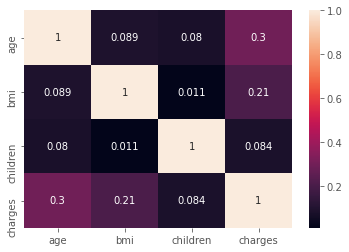

In [29]:
# Ninguna de las variables se observa con una alta correlacion, en este sentido
# podemos inferir que se cumple con una de las reglas matematicas de no multicolinealidad
# Veamos un mapa de calor
sns.heatmap(df_mo.corr(),annot=True)

In [30]:
# La correlacion mas alta es de 0.3 y se da entre edad y la variable objetivo

In [31]:
df_mo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 141 to 971
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   object 
 5   region    1003 non-null   object 
 6   charges   1003 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 62.7+ KB


In [32]:
#encodeamos a las variables categoricas para iniciar la construccion del modelo 

df = pd.get_dummies(df_mo,drop_first=True)

In [33]:
df.sample(5)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
518,35,31.000,1,5240.76500,0,0,0,0,1
220,34,33.700,1,5012.47100,0,0,0,0,1
635,64,38.190,0,14410.93210,1,0,0,0,0
981,34,21.375,0,4500.33925,1,0,0,0,0
532,59,29.700,2,12925.88600,1,0,0,1,0


In [34]:
x = df.drop("charges", axis=1)
y = df["charges"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=15)

In [45]:
X_train.shape

(752, 8)

In [36]:
# Primero ajusto el modelo

model = LinearRegression()
model.fit(X_train, y_train)
print("intercept: ",model.intercept_)
print("variables: ",X_train.columns)
print("coeficiente: ",model.coef_)

intercept:  -12322.780666106872
variables:  Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
coeficiente:  [  262.64268425   330.3873498    421.69609669   -60.701393
 24597.99435407   288.64980564  -279.78534388  -164.1621968 ]


In [37]:
# Creo la variable predictora para graficar

y_pred = model.predict(X_test)
print(f'R2 scoere : {r2_score(y_test,y_pred)}')
print(f'MSQ square error : {mean_squared_error(y_test,y_pred)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))}')


R2 scoere : 0.7654733394940141
MSQ square error : 33598695.61393792
RMSE : 5796.438183396586


In [38]:
# Creo un segundo modelo con statsmodels
import statsmodels.api as sm

In [39]:
# Creo un segundo modelo con el metodo de Ordinary Lineal square

reg_lin = sm.add_constant(X_train)
model2 = sm.OLS(y_train, reg_lin)
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     295.2
Date:                Thu, 14 Jul 2022   Prob (F-statistic):          7.44e-225
Time:                        21:25:25   Log-Likelihood:                -7621.7
No. Observations:                 752   AIC:                         1.526e+04
Df Residuals:                     743   BIC:                         1.530e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.232e+04   1310.408     -9.404      0.000   -1.49e+04   -9750.237
age                262.6427     15.856     16.564      0.000     231.515     293.771
bmi                330.3873     38.797      8.516      0.000     254.222     406.553
children           421.6961    185.304      2.276      0.023      57.914     785.478
sex_male           -60.7014    450.511     -0.135      0.893    -945.128     823.725
smoker_yes         2.46e+04    559.713     43.948      0.000    2.35e+04    2.57e+04
region_northwest   288.6498    642.423      0.449      0.653    -972.531    1549.830
region_southeast  -279.7853    651.907     -0.429      0.668   -1559.585    1000.014
region_southwest  -164.1622    650.538     -0.252      0.801   -1441.273    1112.948
==============================================================================
Omnibus:                      177.625   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.594
Skew:                           1.195   Prob(JB):                    6.48e-103
Kurtosis:                       6.050   Cond. No.                         301.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
import statsmodels.formula.api as smf

In [41]:
# Otra forma de obtener el mismo modelo o de crearlo con Statsmodels seria

formula = 'charges ~ age+bmi+children+sex_male+smoker_yes+region_northwest+region_southeast+region_southwest'
res = smf.ols(formula=formula, data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     399.0
Date:                Thu, 14 Jul 2022   Prob (F-statistic):          4.35e-304
Time:                        21:25:26   Log-Likelihood:                -10152.
No. Observations:                1003   AIC:                         2.032e+04
Df Residuals:                     994   BIC:                         2.037e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.178e+04   1137.643  

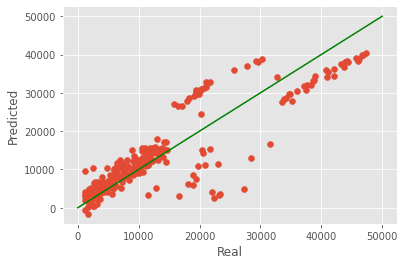

In [42]:
# Grafico el modelo de regresion lineal
plt.scatter(x=y_test, y=y_pred)
plt.plot([0,50000],[0,50000], color='Green' )
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.show()

In [43]:
# Conclusiones sobre los datos y resultados obtenidos

# Objetivo :  predecir el costo del seguro en función de la edad, sexo, masa corporal y region

# El modelo con todas las variables predictoras o explicativas, tiene un R2 alto (76,3%), 
# y es capaz de explicar a la variable dependiende en este caso el costo del seguro en un 76,3%
# de la variabilidad observada en el costo. 


In [ ]:
# vamos a crear nuevamente el modelo pero con matrices,acorde al p-value obtenido
# para el coeficiente parcial de regresion de sex_male (0.822), esta variable no contribuye
# de forma significativa al modelo, entrenaremos un nuevo modelo, pero excluiremos
# al predictor sex_male

In [54]:
# Creación del modelo utilizando matrices
# ==============================================================================
# Se elimina la columna children del conjunto de train y test
X_train = X_train.drop(columns = 'sex_male')
X_test  = X_test.drop(columns = 'sex_male')

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     469.9
Date:                Thu, 14 Jul 2022   Prob (F-statistic):          1.12e-227
Time:                        22:01:15   Log-Likelihood:                -7624.4
No. Observations:                 752   AIC:                         1.526e+04
Df Residuals:                     746   BIC:                         1.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.204e+04   1285.781  

In [55]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-14564.922730,-9516.564375
age,234.816152,296.860819
bmi,252.432395,403.636142
smoker_yes,23495.856866,25689.471468
region_northwest,-716.447377,1481.832051
region_southeast,-1288.338942,911.088271


In [58]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
#y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

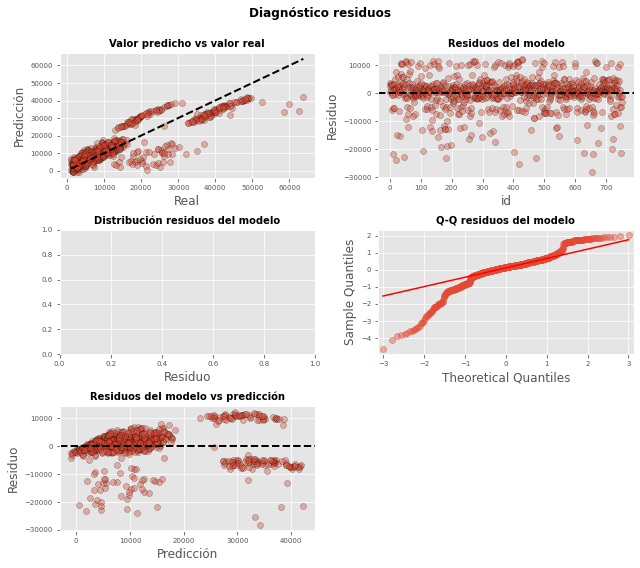

In [68]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [ ]:
# el comportamiento de los residuos apunta a una falta de homocedasticidad y de distribucion normal

In [70]:
from scipy import stats

In [71]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.9018552303314209, pvalue=1.5194027499795508e-21)

In [72]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 174.2243760005999, p-value = 1.4711516559350604e-38


In [ ]:
# Como en ambos el p-value < 0.01 se entiende que no tienen una distribucion normal

In [73]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
648,2093.325842,477.038289,1156.828577,3029.823107,-10012.301755,14198.953439
246,16205.924506,579.656971,15067.971474,17343.877538,4083.048218,28328.800794
460,12812.612161,490.243062,11850.191959,13775.032364,704.951568,24920.272754
77,5008.296872,539.806394,3948.576462,6068.017282,-7107.486212,17124.079955


In [74]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 5837.921648490964


In [ ]:
#No se satisfacen las condiciones de normalidad, por lo que los intervalos de confianza estimados para los coeficientes y las predicciones no son fiables.